In [2]:
# # parameters
# TOPHAT_KERNEL_SIZE = 7
# TOPHAT_BREAK = 2000
# LOCAL_MAX_ABS_THRE = 11000 # 200
# LOCAL_MAX_ABS_THRE_C = {'cy5': 11000, 'TxRed': 11000, 'cy3': 11000, 'FAM': 5000}
# INTENSITY_THRE = None # INTENSITY_ABS_THRE should be a little bigger than LOCAL_MAX_ABS_THRE
# CAL_SNR = False

# # Threshold after extracting points
# SUM_THRESHOLD = 44000 # SUM_THRESHOLD should be 4 * INTENSITY_ABS_THRE
# G_ABS_THRESHOLD = 55000
# G_THRESHOLD = 3 #
# G_MAXVALUE = 5 #

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from tifffile import imread
import re

def process_image(image_path, output_dir):
    """处理单个图像文件，生成信号分布图和水平剖面图"""
    # 确保输出目录存在
    os.makedirs(output_dir, exist_ok=True)
    
    # 从文件路径提取基本信息
    basename = os.path.splitext(os.path.basename(image_path))[0]
    cycle_match = re.search(r'cyc_(\d+)', basename, re.IGNORECASE)
    channel_match = re.search(r'_(DAPI|cy3|cy5|FAM|TxRed)', basename, re.IGNORECASE)
    title_base = f"{cycle_match.group(1)+' ' if cycle_match else ''}{channel_match.group(1).upper() if channel_match else ''}".strip()
    
    # 读取图像并处理
    print(f"正在处理: {os.path.basename(image_path)}")
    image = imread(image_path)
    output_prefix = os.path.join(output_dir, basename)
    
    # 信号分布图
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title(f"{title_base} - Signal Distribution" if title_base else "Image Signal Distribution")
    plt.colorbar(label="Signal Intensity")
    plt.savefig(f"{output_prefix}_signal_distribution.png", dpi=150, bbox_inches='tight')
    plt.close()
    
    # 水平剖面图
    plt.figure(figsize=(10, 4))
    plt.plot(np.mean(image, axis=0), label="Horizontal Profile")
    plt.title(f"{title_base} - Horizontal Profile" if title_base else "Horizontal Signal Intensity Profile")
    plt.xlabel("X Position")
    plt.ylabel("Signal Intensity")
    plt.legend()
    plt.savefig(f"{output_prefix}_horizontal_profile.png", dpi=150, bbox_inches='tight')
    plt.close()
    
    return f"{output_prefix}_signal_distribution.png", f"{output_prefix}_horizontal_profile.png"

def process_all_images(input_dir, output_dir):
    """处理输入目录中的所有TIFF图像"""
    # 确保输出目录存在
    os.makedirs(output_dir, exist_ok=True)
    
    # 获取所有TIFF文件
    tif_files = glob.glob(os.path.join(input_dir, "*.tif"))
    
    if not tif_files:
        print(f"在 {input_dir} 中没有找到TIFF文件")
        return
    
    print(f"找到 {len(tif_files)} 个TIFF文件，开始处理...")
    
    # 处理每个文件
    results = []
    for file_path in tif_files:
        try:
            dist_path, profile_path = process_image(file_path, output_dir)
            results.append((file_path, dist_path, profile_path))
        except Exception as e:
            print(f"处理 {os.path.basename(file_path)} 时出错: {str(e)}")
    
    # 打印结果摘要
    print("\n处理完成！结果摘要:")
    for file_path, dist_path, profile_path in results:
        print(f"- 原始文件: {os.path.basename(file_path)}")
        print(f"  信号分布图: {os.path.basename(dist_path)}")
        print(f"  水平剖面图: {os.path.basename(profile_path)}")
    
    return results

找到 5 个TIFF文件，开始处理...
正在处理: cyc_1_cy5.tif
正在处理: cyc_1_DAPI.tif
正在处理: cyc_1_FAM.tif
正在处理: cyc_1_TxRed.tif


<tifffile.TiffFile 'img-stitched-1.tif'> contains no pages


正在处理: img-stitched-1.tif
处理 img-stitched-1.tif 时出错: Invalid shape (0,) for image data

处理完成！结果摘要:
- 原始文件: cyc_1_cy5.tif
  信号分布图: cyc_1_cy5_signal_distribution.png
  水平剖面图: cyc_1_cy5_horizontal_profile.png
- 原始文件: cyc_1_DAPI.tif
  信号分布图: cyc_1_DAPI_signal_distribution.png
  水平剖面图: cyc_1_DAPI_horizontal_profile.png
- 原始文件: cyc_1_FAM.tif
  信号分布图: cyc_1_FAM_signal_distribution.png
  水平剖面图: cyc_1_FAM_horizontal_profile.png
- 原始文件: cyc_1_TxRed.tif
  信号分布图: cyc_1_TxRed_signal_distribution.png
  水平剖面图: cyc_1_TxRed_horizontal_profile.png


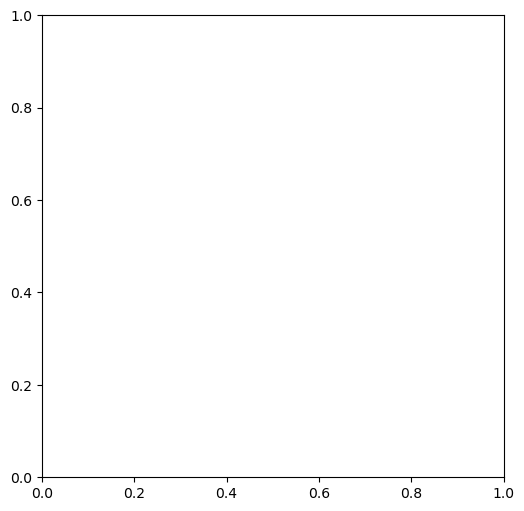

In [3]:
# 使用示例
if __name__ == "__main__":
    # 设置输入和输出目录
    input_dir = "D:/3_PRISM/20251021_2dmouse_huanglab/20220918_PRISM_Brain_30plex_DAPI_processed/stitched/"
    output_dir = "D:/3_PRISM/20251021_2dmouse_huanglab/20220918_PRISM_Brain_30plex_DAPI_processed/"
    
    # 处理所有图像
    process_all_images(input_dir, output_dir)